In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

import torch
import torchvision.datasets as datasets
import kornia as K


from torchvision import utils
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid

Text(0.5, 1.0, 'costx3')

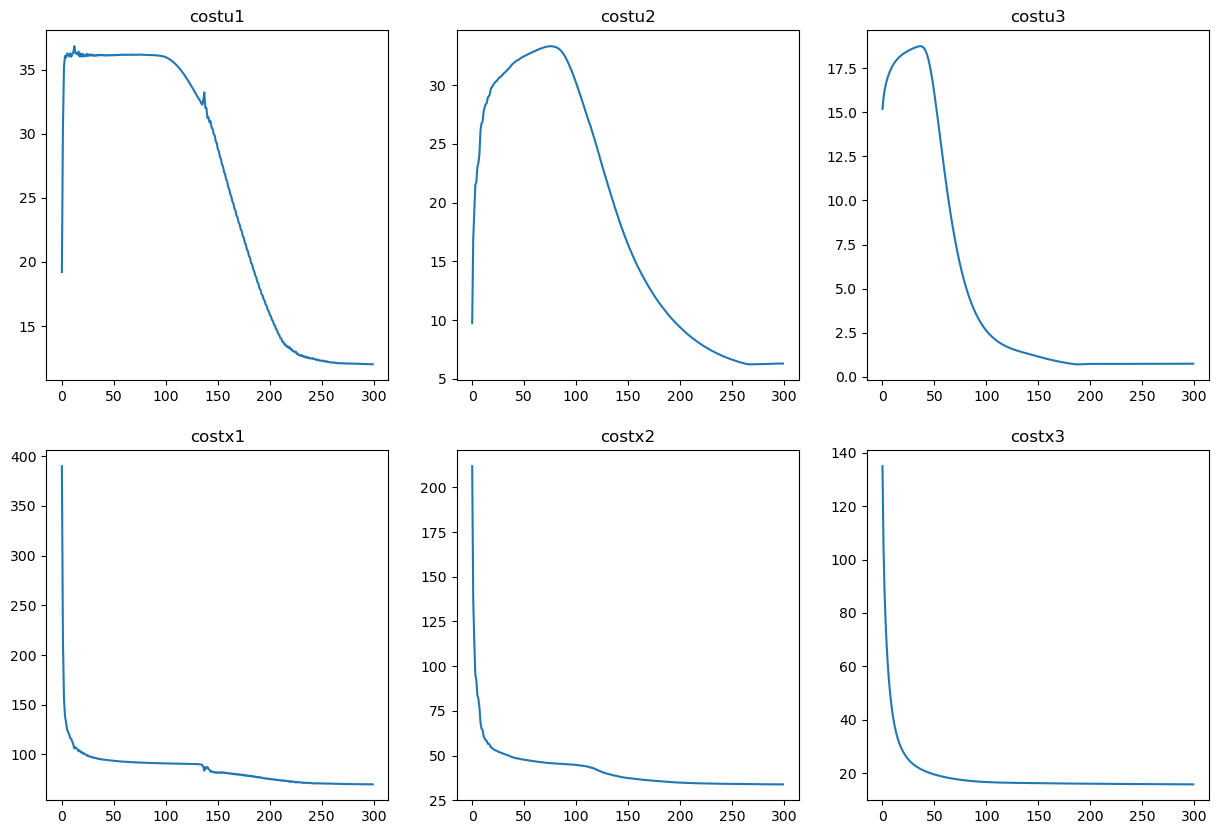

In [2]:
# load costu1 to costu3, costx1 to costx3 and plot everything with 2,3 subplots
cost_folder = "runs/14/"
costu1 = np.load(cost_folder+'costu1.npy')
costu2 = np.load(cost_folder+'costu2.npy')
costu3 = np.load(cost_folder+'costu3.npy')
costx1 = np.load(cost_folder+'costx1.npy')
costx2 = np.load(cost_folder+'costx2.npy')
costx3 = np.load(cost_folder+'costx3.npy')

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].plot(np.mean(costu1,axis=1))
axs[0, 0].set_title('costu1')
axs[0, 1].plot(np.mean(costu2,axis=1))
axs[0, 1].set_title('costu2')
axs[0, 2].plot(np.mean(costu3,axis=1))
axs[0, 2].set_title('costu3')
axs[1, 0].plot(np.mean(costx1,axis=1))
axs[1, 0].set_title('costx1')
axs[1, 1].plot(np.mean(costx2,axis=1))
axs[1, 1].set_title('costx2')
axs[1, 2].plot(np.mean(costx3,axis=1))
axs[1, 2].set_title('costx3')

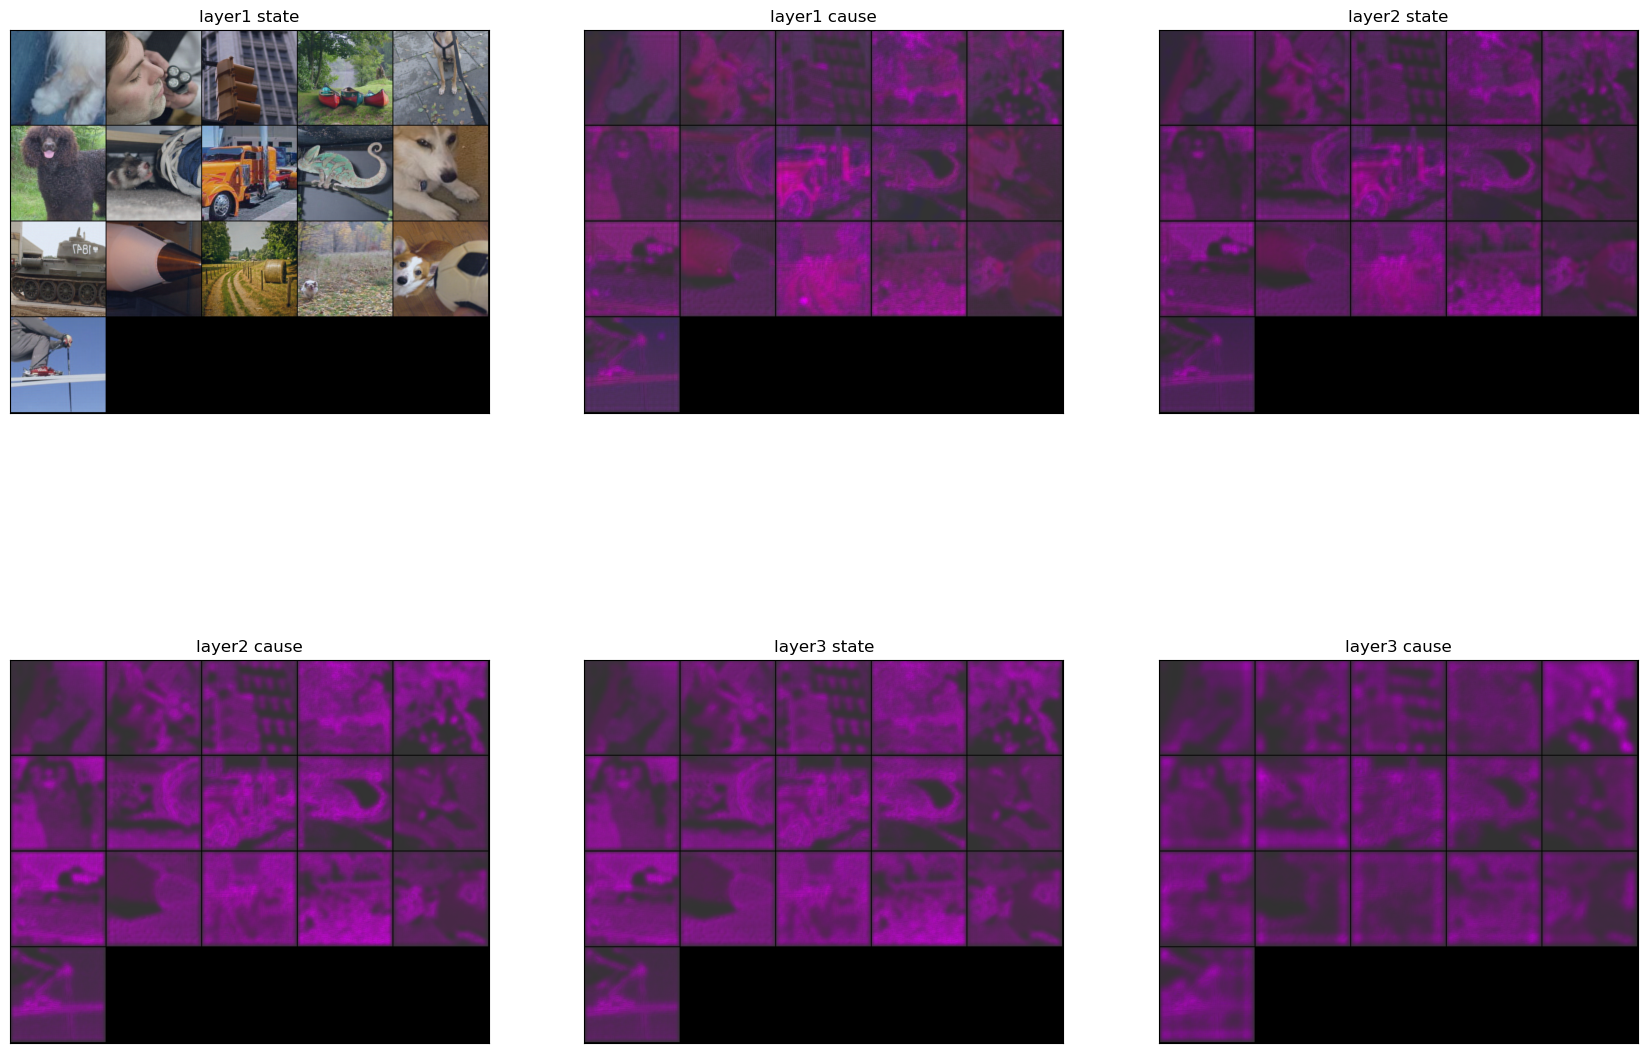

In [5]:
device = torch.device("cpu")
folder = "runs/20/imagenet/recon_cause/"
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0))[:512])

# recon11 = torch.load('recon11.pt')
# recon11 = make_grid(recon11[0:30], nrow=5, normalize=True).cpu().numpy()

# recon12 = torch.load('recon12.pt')
# recon12 = make_grid(recon12[0:30], nrow=5, normalize=True).cpu().numpy()

# recon21 = torch.load('recon21.pt')
# recon21 = make_grid(recon21[0:30], nrow=5, normalize=True).cpu().numpy()

# recon22 = torch.load('recon22.pt')
# recon22 = make_grid(recon22[0:30], nrow=5, normalize=True).cpu().numpy()

# recon31 = torch.load('recon3.pt')
# recon31 = make_grid(recon31[0:30], nrow=5, normalize=True).cpu().numpy()

# recon32 = torch.load('recon3.pt')
# recon32 = make_grid(recon32[0:30], nrow=5, normalize=True).cpu().numpy()



# plt.figure(figsize=(21,15))
# plt.subplot(2,3,1)
# plt.imshow(np.transpose(recon11,[1,2,0]))
# plt.title('layer1 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,2)
# plt.imshow(np.transpose(recon12,[1,2,0]))
# plt.title(r'layer1 cause')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,3)
# plt.imshow(np.transpose(recon21,[1,2,0]))
# plt.title(r'layer2 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,4)
# plt.imshow(np.transpose(recon22,[1,2,0]))
# plt.title('layer2 cause')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,5)
# plt.imshow(np.transpose(recon31,[1,2,0]))
# plt.title(r'layer3 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,6)
# plt.imshow(np.transpose(recon32,[1,2,0]))
# plt.title(r'layer3 cause')
# plt.xticks([])
# plt.yticks([])
# plt.show()


recon11 = torch.load(folder+'recon11_u.pt')
recon11 = make_grid(recon11, nrow=5, normalize=True).cpu().numpy()

recon12 = torch.load(folder+'recon12_u.pt')
recon12 = make_grid(recon12, nrow=5, normalize=True).cpu().numpy()

recon21 = torch.load(folder+'recon21_u.pt')
recon21 = make_grid(recon21, nrow=5, normalize=True).cpu().numpy()

recon22 = torch.load(folder+'recon22_u.pt')
recon22 = make_grid(recon22, nrow=5, normalize=True).cpu().numpy()

recon31 = torch.load(folder+'recon31_u.pt')
recon31 = make_grid(recon31, nrow=5, normalize=True).cpu().numpy()

recon32 = torch.load(folder+'recon32_u.pt')
recon32 = make_grid(recon32, nrow=5, normalize=True).cpu().numpy()


gam = 1.5
plt.figure(figsize=(21,15))
plt.subplot(2,3,1)
plt.imshow(np.transpose(recon11,[1,2,0]))
plt.title('layer1 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,2)
plt.imshow(np.transpose(recon12,[1,2,0])**gam)
plt.title(r'layer1 cause')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,3)
plt.imshow(np.transpose(recon21,[1,2,0])**gam)
plt.title(r'layer2 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,4)
plt.imshow(np.transpose(recon22,[1,2,0])**gam)
plt.title('layer2 cause')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,5)
plt.imshow(np.transpose(recon31,[1,2,0])**gam)
plt.title(r'layer3 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,6)
plt.imshow(np.transpose(recon32,[1,2,0])**gam)
plt.title(r'layer3 cause')
plt.xticks([])
plt.yticks([])
plt.show()

# costx1 = np.load('costx1.npy')
# costu1 = np.load('costu1.npy')
# costx2 = np.load('costx2.npy')
# costu2 = np.load('costu2.npy')
# costx3 = np.load('costx3.npy')
# costu3 = np.load('costu3.npy')

# plt.figure(figsize=(21,15))
# plt.subplot(2,3,1)
# plt.plot(costx1)
# plt.title(r'x1')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,2)
# plt.plot(costu1)
# plt.title(r'u1')

# plt.subplot(2,3,3)
# plt.plot(costx2)
# plt.title(r'x2')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,4)
# plt.plot(costu2)
# plt.title('u2')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,5)
# plt.plot(costx3)
# plt.title(r'x3')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,6)
# plt.plot(costu3)
# plt.title(r'u3')
# plt.xticks([])
# plt.yticks([])
# plt.show()

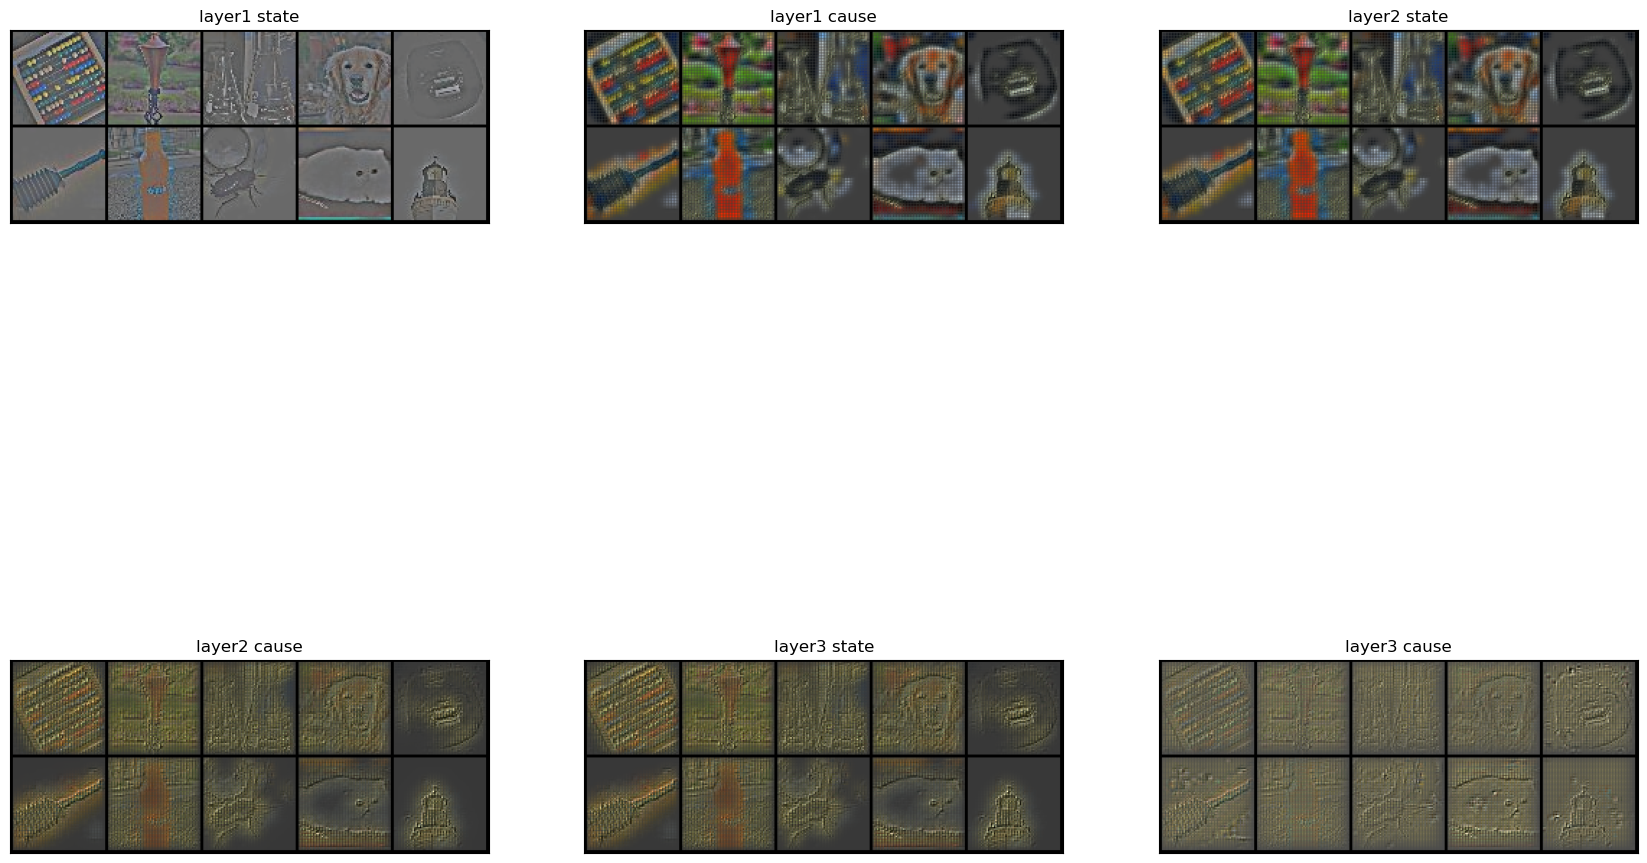

In [42]:
device = torch.device("cpu")
folder = "runs/14/recon_cause/"
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0))[:512])

# recon11 = torch.load('recon11.pt')
# recon11 = make_grid(recon11[0:30], nrow=5, normalize=True).cpu().numpy()

# recon12 = torch.load('recon12.pt')
# recon12 = make_grid(recon12[0:30], nrow=5, normalize=True).cpu().numpy()

# recon21 = torch.load('recon21.pt')
# recon21 = make_grid(recon21[0:30], nrow=5, normalize=True).cpu().numpy()

# recon22 = torch.load('recon22.pt')
# recon22 = make_grid(recon22[0:30], nrow=5, normalize=True).cpu().numpy()

# recon31 = torch.load('recon3.pt')
# recon31 = make_grid(recon31[0:30], nrow=5, normalize=True).cpu().numpy()

# recon32 = torch.load('recon3.pt')
# recon32 = make_grid(recon32[0:30], nrow=5, normalize=True).cpu().numpy()



# plt.figure(figsize=(21,15))
# plt.subplot(2,3,1)
# plt.imshow(np.transpose(recon11,[1,2,0]))
# plt.title('layer1 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,2)
# plt.imshow(np.transpose(recon12,[1,2,0]))
# plt.title(r'layer1 cause')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,3)
# plt.imshow(np.transpose(recon21,[1,2,0]))
# plt.title(r'layer2 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,4)
# plt.imshow(np.transpose(recon22,[1,2,0]))
# plt.title('layer2 cause')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,5)
# plt.imshow(np.transpose(recon31,[1,2,0]))
# plt.title(r'layer3 state')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,6)
# plt.imshow(np.transpose(recon32,[1,2,0]))
# plt.title(r'layer3 cause')
# plt.xticks([])
# plt.yticks([])
# plt.show()

# randomly permute 32 indices
indices = np.random.permutation(32)
recon11 = torch.load(folder+'recon11_u.pt')[indices][:10,...]
recon11 = make_grid(recon11, nrow=5, normalize=True).cpu().numpy()

recon12 = torch.load(folder+'recon12_u.pt')[indices][:10,...]
recon12 = make_grid(recon12, nrow=5, normalize=True).cpu().numpy()

recon21 = torch.load(folder+'recon21_u.pt')[indices][:10,...]
recon21 = make_grid(recon21, nrow=5, normalize=True).cpu().numpy()

recon22 = torch.load(folder+'recon22_u.pt')[indices][:10,...]
recon22 = make_grid(recon22, nrow=5, normalize=True).cpu().numpy()

recon31 = torch.load(folder+'recon31_u.pt')[indices][:10,...]
recon31 = make_grid(recon31, nrow=5, normalize=True).cpu().numpy()

recon32 = torch.load(folder+'recon32_u.pt')[indices][:10,...]
recon32 = make_grid(recon32, nrow=5, normalize=True).cpu().numpy()


gam = 1.5
plt.figure(figsize=(21,15))
plt.subplot(2,3,1)
plt.imshow(np.transpose(recon11,[1,2,0]))
plt.title('layer1 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,2)
plt.imshow(np.transpose(recon12,[1,2,0])**gam)
plt.title(r'layer1 cause')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,3)
plt.imshow(np.transpose(recon21,[1,2,0])**gam)
plt.title(r'layer2 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,4)
plt.imshow(np.transpose(recon22,[1,2,0])**gam)
plt.title('layer2 cause')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,5)
plt.imshow(np.transpose(recon31,[1,2,0])**gam)
plt.title(r'layer3 state')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,6)
plt.imshow(np.transpose(recon32,[1,2,0])**gam)
plt.title(r'layer3 cause')
plt.xticks([])
plt.yticks([])
plt.show()

# costx1 = np.load('costx1.npy')
# costu1 = np.load('costu1.npy')
# costx2 = np.load('costx2.npy')
# costu2 = np.load('costu2.npy')
# costx3 = np.load('costx3.npy')
# costu3 = np.load('costu3.npy')

# plt.figure(figsize=(21,15))
# plt.subplot(2,3,1)
# plt.plot(costx1)
# plt.title(r'x1')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,2)
# plt.plot(costu1)
# plt.title(r'u1')

# plt.subplot(2,3,3)
# plt.plot(costx2)
# plt.title(r'x2')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,4)
# plt.plot(costu2)
# plt.title('u2')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,5)
# plt.plot(costx3)
# plt.title(r'x3')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,3,6)
# plt.plot(costu3)
# plt.title(r'u3')
# plt.xticks([])
# plt.yticks([])
# plt.show()

In [6]:
recon11.shape

(3, 464, 332)

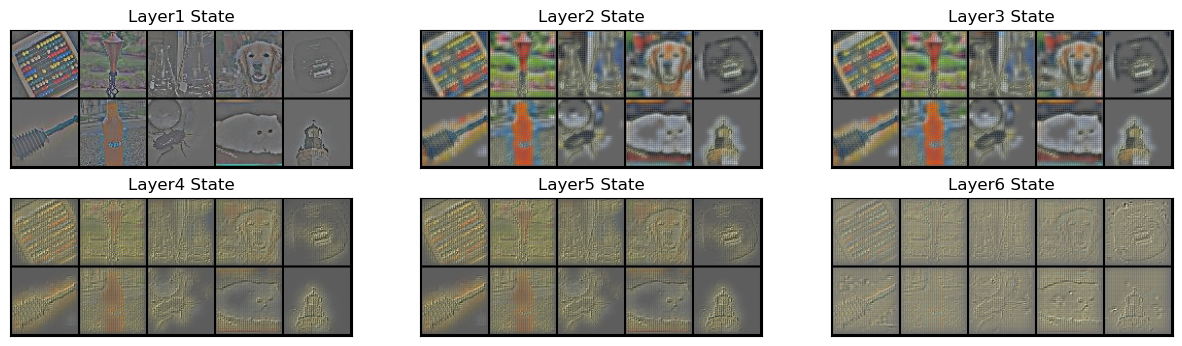

In [43]:
plt.figure(figsize=(15,4))
plt.tight_layout()
plt.subplot(2,3,1)
plt.imshow(np.transpose(recon11,[1,2,0]))
plt.title('Layer1 State')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,2)
plt.imshow(np.transpose(recon12,[1,2,0]))
plt.title('Layer2 State')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,3)
plt.imshow(np.transpose(recon21,[1,2,0]))
plt.title('Layer3 State')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,4)
plt.imshow(np.transpose(recon22,[1,2,0]))
plt.title('Layer4 State')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,5)
plt.imshow(np.transpose(recon31,[1,2,0]))
plt.title('Layer5 State')
plt.xticks([])
plt.yticks([])
plt.subplot(2,3,6)
plt.imshow(np.transpose(recon32,[1,2,0]))
plt.title('Layer6 State')
plt.xticks([])
plt.yticks([])
#plt.show()
plt.savefig('imagenet_DPCN_SCA.pdf',bbox_inches='tight')